In [2]:
import pandas as pd

# Read the CSV file
data = pd.read_csv('..\Results\clean_data.csv')

number_sessions = data['eid'].nunique()
number_probes = data['pid'].nunique()
total_V1_channels = data['total_V1_channels']
total_bad_channels = data['total_bad_channels']
total_V1_channels_claean = total_V1_channels - total_bad_channels
min_V1_channels = total_V1_channels_claean.min()
max_V1_channels = total_V1_channels_claean.max()
mean_V1_channels = total_V1_channels_claean.mean()
total_trials = data['total trials']
bad_trials = data['total bad trials']
trials_clean = total_trials - bad_trials
min_trials = trials_clean.min()
max_trials = trials_clean.max()
mean_trials = trials_clean.mean()
print(f'Number of sessions: {number_sessions}')
print(f'Number of probes: {number_probes}')
print(f'Minimum number of V1 channels clean: {min_V1_channels}')
print(f'Maximum number of V1 channels clean: {max_V1_channels}')
print(f'Mean number of V1 channels clean: {mean_V1_channels}')
print(f'Minimum number of trials clean: {min_trials}')
print(f'Maximum number of trials clean: {max_trials}')
print(f'Mean number of trials clean: {mean_trials}')

Number of sessions: 41
Number of probes: 41
Minimum number of V1 channels clean: 2
Maximum number of V1 channels clean: 118
Mean number of V1 channels clean: 54.829268292682926
Minimum number of trials clean: 276.0
Maximum number of trials clean: 1098.0
Mean number of trials clean: 532.6585365853658


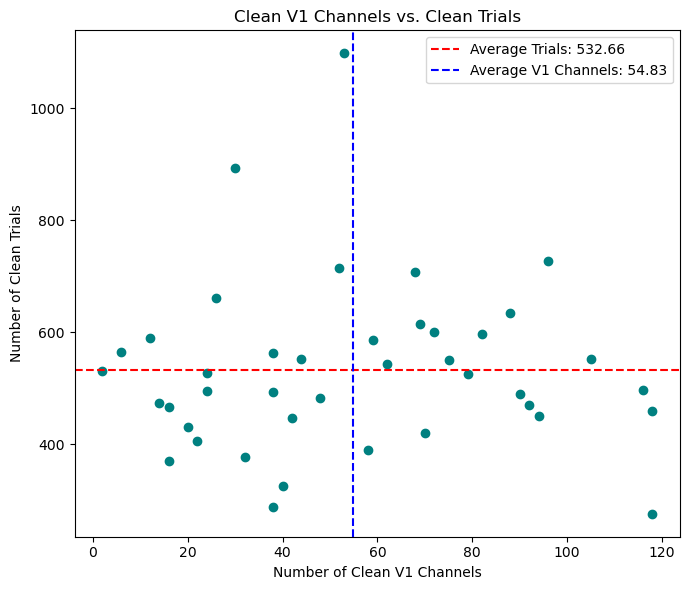

In [17]:

# Calculations
number_sessions = data['eid'].nunique()
number_probes = data['pid'].nunique()
total_V1_channels = data['total_V1_channels']
total_bad_channels = data['total_bad_channels']
total_V1_channels_clean = total_V1_channels - total_bad_channels
min_V1_channels = total_V1_channels_clean.min()
max_V1_channels = total_V1_channels_clean.max()
mean_V1_channels = total_V1_channels_clean.mean()
total_trials = data['total trials']
bad_trials = data['total bad trials']
trials_clean = total_trials - bad_trials
min_trials = trials_clean.min()
max_trials = trials_clean.max()
mean_trials = trials_clean.mean()

# Plotting only the scatter plot for Clean V1 Channels vs. Clean Trials

# Replotting with average lines

fig, ax = plt.subplots(figsize=(7, 6))

# Plot: Clean V1 Channels vs. Clean Trials
ax.scatter(total_V1_channels_clean, trials_clean, color='teal')
ax.axhline(mean_trials, color='red', linestyle='--', label=f'Average Trials: {mean_trials:.2f}')
ax.axvline(mean_V1_channels, color='blue', linestyle='--', label=f'Average V1 Channels: {mean_V1_channels:.2f}')
ax.set_title('Clean V1 Channels vs. Clean Trials')
ax.set_xlabel('Number of Clean V1 Channels')
ax.set_ylabel('Number of Clean Trials')
ax.legend()

plt.tight_layout()
plt.show()



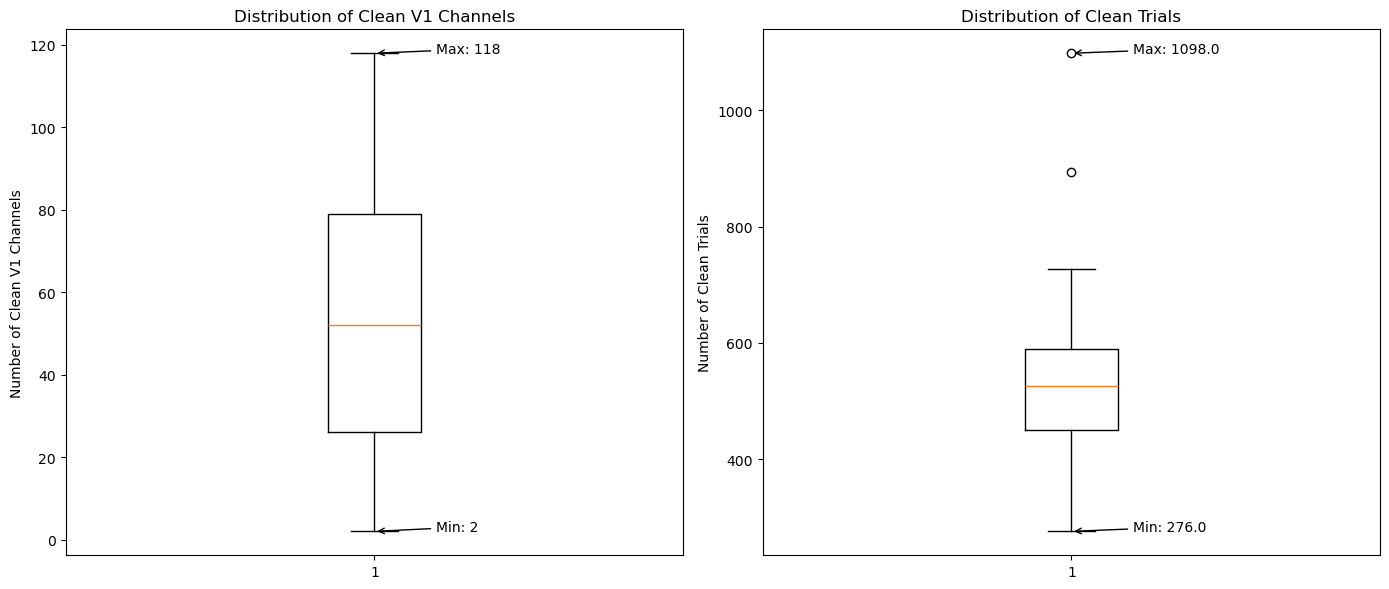

In [16]:
# Plotting box plots with annotations for min and max values

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Box plot for Clean V1 Channels
axs[0].boxplot(total_V1_channels_clean)
axs[0].set_title('Distribution of Clean V1 Channels')
axs[0].set_ylabel('Number of Clean V1 Channels')
axs[0].annotate(f'Min: {min_V1_channels}', xy=(1, min_V1_channels), xytext=(1.1, min_V1_channels),
                arrowprops=dict(facecolor='black', arrowstyle="->"))
axs[0].annotate(f'Max: {max_V1_channels}', xy=(1, max_V1_channels), xytext=(1.1, max_V1_channels),
                arrowprops=dict(facecolor='black', arrowstyle="->"))

# Box plot for Clean Trials
axs[1].boxplot(trials_clean)
axs[1].set_title('Distribution of Clean Trials')
axs[1].set_ylabel('Number of Clean Trials')
axs[1].annotate(f'Min: {min_trials}', xy=(1, min_trials), xytext=(1.1, min_trials),
                arrowprops=dict(facecolor='black', arrowstyle="->"))
axs[1].annotate(f'Max: {max_trials}', xy=(1, max_trials), xytext=(1.1, max_trials),
                arrowprops=dict(facecolor='black', arrowstyle="->"))

plt.tight_layout()
plt.show()


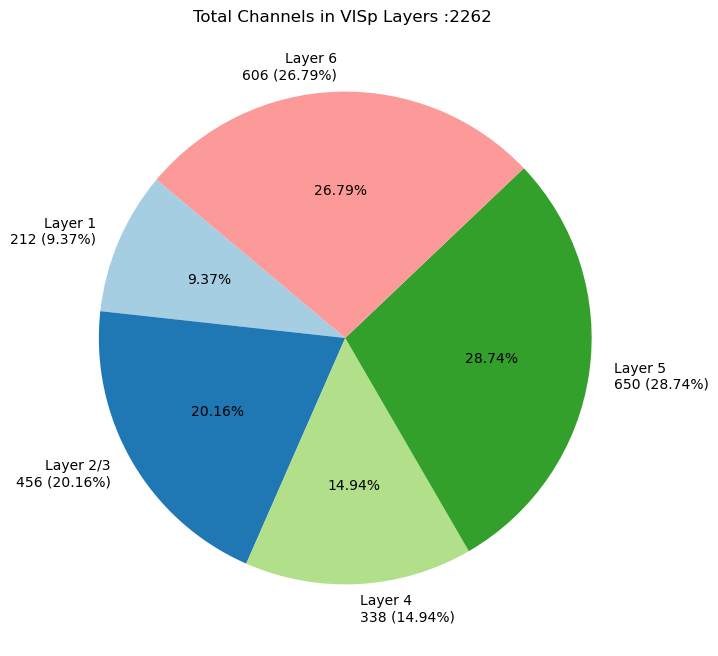

In [12]:
# Combine the totals and percentages for Layer 6a and 6b
layer_totals_combined = {
    'Layer 1': layer_totals['total_channels_VISp1'],
    'Layer 2/3': layer_totals['total_channels_VISp2/3'],
    'Layer 4': layer_totals['total_channels_VISp4'],
    'Layer 5': layer_totals['total_channels_VISp5'],
    'Layer 6': layer_totals['total_channels_VISp6a'] + layer_totals['total_channels_VISp6b']
}

layer_percentages_combined = {
    'Layer 1': (layer_totals_combined['Layer 1'] / total_channel) * 100,
    'Layer 2/3': (layer_totals_combined['Layer 2/3'] / total_channel) * 100,
    'Layer 4': (layer_totals_combined['Layer 4'] / total_channel) * 100,
    'Layer 5': (layer_totals_combined['Layer 5'] / total_channel) * 100,
    'Layer 6': (layer_totals_combined['Layer 6'] / total_channel) * 100
}

# Prepare data for the pie chart
labels_combined = list(layer_totals_combined.keys())
sizes_combined = list(layer_totals_combined.values())
percentages_combined = list(layer_percentages_combined.values())
labels_with_values_combined = [f'{label}\n{size} ({percentage:.2f}%)' for label, size, percentage in zip(labels_combined, sizes_combined, percentages_combined)]

# Creating a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sizes_combined, labels=labels_with_values_combined, autopct='%1.2f%%', startangle=140, colors=plt.cm.Paired.colors)

ax.set_title(f'Total Channels in VISp Layers :{total_channel} ')

plt.show()
